In [2]:
import cv2
import os
import pandas as pd
from skimage import segmentation
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [4]:
output_folder = "/home/datadisk/pipe/results/slic/"

In [77]:
df1 = pd.read_csv("/home/datadisk/pipe/results/sam_road/tester_road/tester_road/output.csv")#'/home/datadisk/pipe/results/sam_box/output.csv')
df = df1
df

,image_path,class,dice_small,dice_sam,dice_sam_com,small_path,sam_path,sam_combine_path,gt_path
0,GEONRW/nrw_dataset/dortmund/393_5708_rgb.jpg,ROAD,0.171551,0.310551,0.077263,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...
1,GEONRW/nrw_dataset/hagen/395_5688_rgb.jpg,ROAD,0.081939,0.256901,0.053003,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...
2,GEONRW/nrw_dataset/bergisch/366_5647_rgb.jpg,ROAD,0.067628,0.403380,0.257033,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...
3,GEONRW/nrw_dataset/bielefeld/475_5768_rgb.jpg,ROAD,0.049582,0.471593,0.213404,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...
4,GEONRW/nrw_dataset/koeln/354_5652_rgb.jpg,ROAD,0.019540,0.187879,0.028105,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...
...,...,...,...,...,...,...,...,...,...
395,GID15/GID/img_dir/val/GF2_PMS2__L1A0000718813-...,ROAD,0.002955,0.006292,0.025318,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...
396,GID15/GID/img_dir/val/GF2_PMS1__L1A0001064454-...,ROAD,0.013113,0.038312,0.082689,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...
397,GID15/GID/img_dir/val/GF2_PMS2__L1A0001787564-...,ROAD,0.043605,0.055801,0.127070,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...
398,GID15/GID/img_dir/val/GF2_PMS1__L1A0001118839-...,ROAD,0.003432,0.017529,0.044298,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...,/home/datadisk/pipe/results/sam_road/tester_ro...


In [43]:
output_folder = "/home/datadisk/pipe/results/slic/"
columns = ["image_path", "slic_path"]
df_save = pd.DataFrame(columns=columns)


data_index = 19


for image_path in df['image_path'].tolist():
    #image_path = df.loc[data_index]['image_path']
    img =cv2.imread('/goss/Datasets/'+image_path)
    #print (int(img.shape[0]*img.shape[1]/500))
    slic = segmentation.slic(img, n_segments=int(img.shape[0]*img.shape[1]/50), compactness=8, max_num_iter=10, start_label=1)

    image_paths = []
    #save
    output_folder = "/home/datadisk/pipe/results/slic/toy_set/"
    os.makedirs(output_folder, exist_ok=True)


    #
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S_%f")
    filename = f"{timestamp}_SLIC.npy"
    filepath = os.path.join(output_folder, filename)

    np.save(filepath, slic)

    new_row = {"image_path": image_path, "slic_path": filepath}
    df_save = df_save.append(new_row, ignore_index=True)


    # Save the DataFrame to a CSV file
df_save.to_csv(output_folder+'slic_segments.csv', index=False)




/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_save = df_save.append(new_row, ignore_index=True)
/tmp/ipykernel_90510/3220954155.py:29: FutureWarning: The frame.append method is deprecated 

# load slic

In [46]:
df_slic

,image_path,slic_path
0,GEONRW/nrw_dataset/dortmund/393_5708_rgb.jpg,/home/datadisk/pipe/results/slic/toy_set/20250...
1,GEONRW/nrw_dataset/hagen/395_5688_rgb.jpg,/home/datadisk/pipe/results/slic/toy_set/20250...
2,GEONRW/nrw_dataset/bergisch/366_5647_rgb.jpg,/home/datadisk/pipe/results/slic/toy_set/20250...
3,GEONRW/nrw_dataset/bielefeld/475_5768_rgb.jpg,/home/datadisk/pipe/results/slic/toy_set/20250...
4,GEONRW/nrw_dataset/koeln/354_5652_rgb.jpg,/home/datadisk/pipe/results/slic/toy_set/20250...
...,...,...
395,GID15/GID/img_dir/val/GF2_PMS2__L1A0000718813-...,/home/datadisk/pipe/results/slic/toy_set/20250...
396,GID15/GID/img_dir/val/GF2_PMS1__L1A0001064454-...,/home/datadisk/pipe/results/slic/toy_set/20250...
397,GID15/GID/img_dir/val/GF2_PMS2__L1A0001787564-...,/home/datadisk/pipe/results/slic/toy_set/20250...
398,GID15/GID/img_dir/val/GF2_PMS1__L1A0001118839-...,/home/datadisk/pipe/results/slic/toy_set/20250...


In [7]:
import pandas as pd
import cv2

def get_slic_masks(df, index):
    slic_masks = []

    mask_path = df.loc[index]['slic_path']  # Get the path of the SLIC mask image
    img_path = df.loc[index]['image_path']  # Get the path of the SLIC mask image
    mask_image = np.load(mask_path)
    if mask_image is not None:
        slic_masks.append(mask_image)  # Add the loaded image to the list
    else:
        print(f"Warning: Unable to load image at {mask_path}")
    
    data_image = cv2.imread('/goss/Datasets/'+img_path)
    
    return slic_masks, data_image



# Load the CSV file containing the paths of the SLIC mask images
csv_path = output_folder+'toy_set/'+'slic_segments.csv'
df_slic = pd.read_csv(csv_path)



# Visualizationn

In [78]:
index = 2
slic_masks, data_image = get_slic_masks(df_slic,index)


fig, ax_arr = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20, 20))
ax1, ax3 = ax_arr.ravel()

ax1.imshow(data_image)
ax1.set_title('Original image')

ax3.imshow(segmentation.mark_boundaries(data_image, slic_masks[0]))
ax3.set_title('SLIC')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

mask_path = df.loc[index]['small_path']
mask_image = cv2.imread(mask_path)
plt.imshow(mask_image)
plt.show()

# Load the SLIC result and segmentation mask
slic_path = df_slic.loc[index]['slic_path']
slic_image = np.load(slic_path)  # Replace with your SLIC mask path

mask_path = df1.loc[index]['small_path']
#mask_image = cv2.imread(mask_path)

mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Replace with your segmentation mask path

# Ensure the mask is binary (0 and 255)
_, mask_image = cv2.threshold(mask_image, 127, 255, cv2.THRESH_BINARY)

# Create a copy of the mask to modify
modified_mask = np.zeros_like(mask_image)

# Iterate over each unique superpixel label
for label in np.unique(slic_image):
    # Create a mask for the current superpixel
    superpixel_mask = slic_image == label

    # Check if any pixel in the superpixel is masked in the original mask
    if np.any(mask_image[superpixel_mask] == 255):
        # Set all pixels in the superpixel to 255 in the modified mask
        modified_mask[superpixel_mask] = 255

# Save or display the modified mask

plt.imshow(modified_mask, cmap='gray')  # Use 'gray' colormap for binary masks
plt.title('Modified Mask')  # Add a title to the plot
plt.axis('off')  # Hide the axes
plt.show()

NameError: name 'get_slic_masks' is not defined

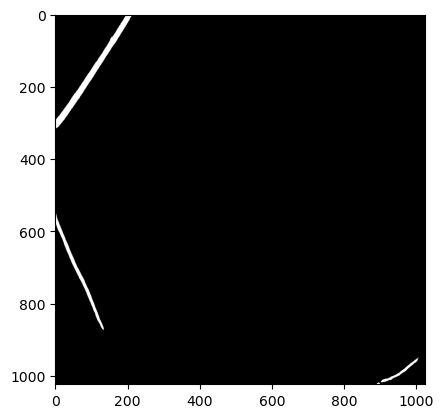

In [18]:
df

NameError: name 'df' is not defined

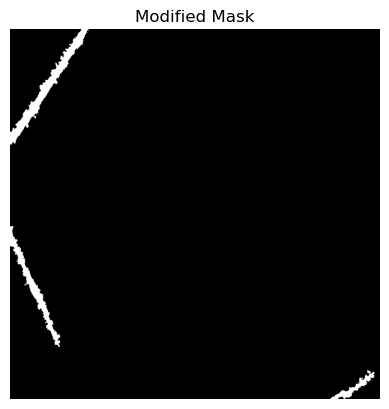

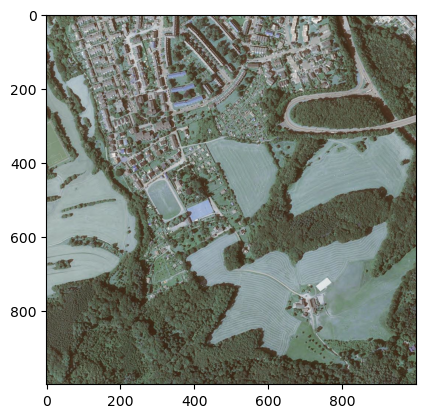

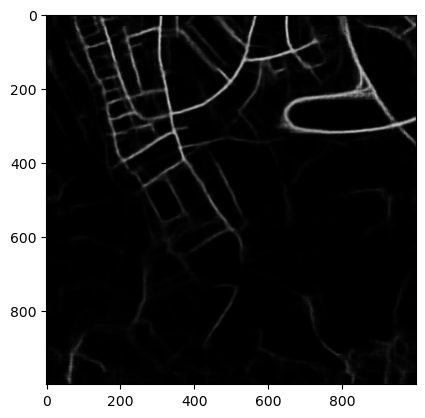

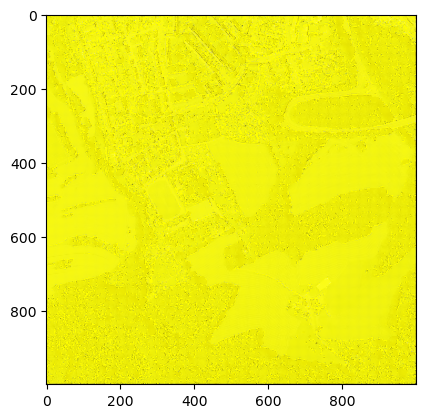

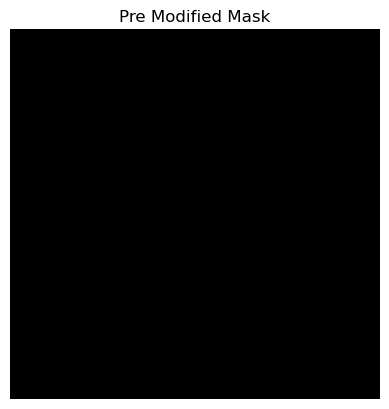

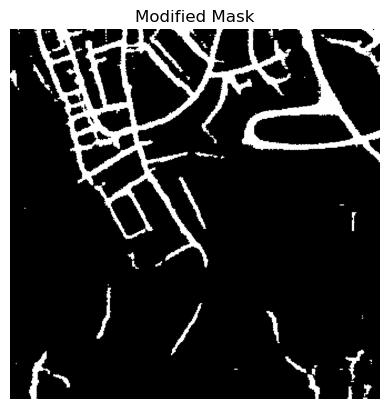

In [79]:
dir_path = 'GEONRW/nrw_dataset/hagen/'
name_index = '395_5688_rgb'
suffix_imae = '.jpg'

#image_path = "/home/datadisk3/huangyekai/SamRoadPlus/save/infer__20250318_110404/viz/"+name_index+".png"
image_path = '/goss/Datasets/'+dir_path+name_index+suffix_imae
data_image = cv2.imread(image_path)


slic_image = segmentation.slic(data_image, n_segments=int(data_image.shape[0]*data_image.shape[1]/10), compactness=20, max_num_iter=10, start_label=1)

plt.imshow(data_image)
plt.show()


mask_path = "/home/datadisk3/huangyekai/SamRoadPlus/save/infer__20250318_110404/mask/"+name_index+"_road.png"
mask_image = cv2.imread(mask_path)
plt.imshow(mask_image)
plt.show()

#print (int(img.shape[0]*img.shape[1]/500))


plt.imshow(segmentation.mark_boundaries(data_image, slic_image))
plt.show()

# # Load the SLIC result and segmentation mask
# slic_path = df_slic.loc[index]['slic_path']
# slic_image = np.load(slic_path)  # Replace with your SLIC mask path

# mask_path = df1.loc[index]['small_path']
# #mask_image = cv2.imread(mask_path)

# mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Replace with your segmentation mask path

# # Ensure the mask is binary (0 and 255)
_, mask_image = cv2.threshold(mask_image, 15, 255, cv2.THRESH_BINARY)

# Create a copy of the mask to modify
modified_mask = np.zeros_like(mask_image)

plt.imshow(modified_mask, cmap='gray')  # Use 'gray' colormap for binary masks
plt.title('Pre Modified Mask')  # Add a title to the plot
plt.axis('off')  # Hide the axes
plt.show()

# Iterate over each unique superpixel label
for label in np.unique(slic_image):
    # Create a mask for the current superpixel
    superpixel_mask = slic_image == label

    # Check if any pixel in the superpixel is masked in the original mask
    if np.any(mask_image[superpixel_mask] == 255):
        # Set all pixels in the superpixel to 255 in the modified mask
        modified_mask[superpixel_mask] = 255

# Save or display the modified mask

plt.imshow(modified_mask, cmap='gray')  # Use 'gray' colormap for binary masks
plt.title('Modified Mask')  # Add a title to the plot
plt.axis('off')  # Hide the axes
plt.show()

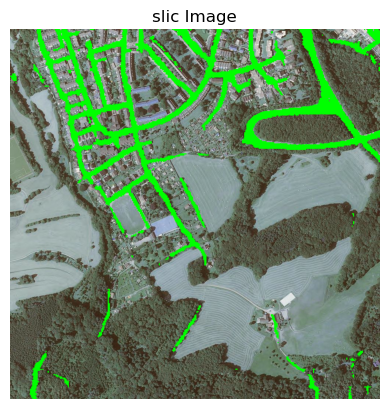

In [75]:

# Choose a color for the mask (e.g., red in BGR format)
gray_image = cv2.cvtColor(modified_mask, cv2.COLOR_BGR2GRAY)

data_image = cv2.imread(image_path)
overlay_color = [0, 255, 0]  # Green color for the mask
mask_indices = gray_image == 255
data_image[mask_indices] = overlay_color

plt.imshow(data_image)  # Convert BGR to RGB for display
plt.title('slic Image')  # Add a title to the plot
plt.axis('off')  # Hide the axes
plt.show()

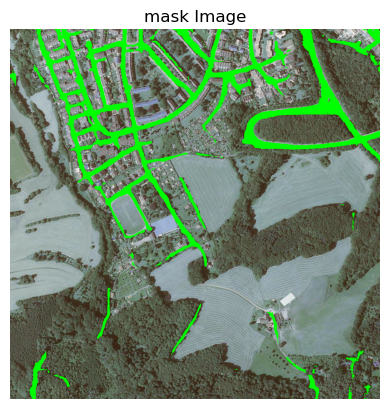

In [80]:

# Choose a color for the mask (e.g., red in BGR format)
gray_image = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)

data_image = cv2.imread(image_path)
overlay_color = [0, 255, 0]  # Green color for the mask
mask_indices = gray_image == 255
data_image[mask_indices] = overlay_color

plt.imshow(data_image)  # Convert BGR to RGB for display
plt.title('mask Image')  # Add a title to the plot
plt.axis('off')  # Hide the axes
plt.show()

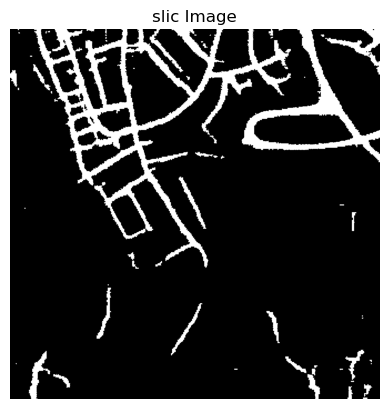

In [84]:

plt.imshow(modified_mask)  # Convert BGR to RGB for display
plt.title('slic Image')  # Add a title to the plot
plt.axis('off')  # Hide the axes
plt.show()

In [85]:
cv2.imwrite('/home/datadisk/pipe/results/tmp/test.png',modified_mask)

True